# Boston Housing Prices Prediction Notebook

## Introduction
This Jupyter Notebook demonstrates a machine learning workflow to predict house prices in Boston using the **Boston Housing Dataset**.

## Objectives
- Explore and visualize the dataset to identify key patterns and correlations.
- Preprocess the data to handle missing values and scale features.
- Train and evaluate regression models, including Linear Regression and Random Forest.
- Interpret results to understand feature importance and model performance.

## Dataset
The [Boston Housing Dataset](https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd) is used, with features like:
- **PTRATIO**: Ratio of students to teachers in primary and secondary schools in the neighbourhood
- **RM**: Average number of rooms per dwelling
- **LSTAT**: Percentage of lower-status population
- **MEDV**: Median house price (in $1000s, target variable)

## Workflow
1. **Data Loading and Exploration**:
   - Load the dataset using pandas.
   - Visualize distributions and correlations (e.g., heatmap, scatter plots).
2. **Preprocessing**:
   - Check for missing values and outliers.
   - Normalize numerical features using StandardScaler.
   - Split data into training (80%) and testing (20%) sets.
3. **Modeling**:
   - Train a Linear Regression model as a baseline.
   - Train a Random Forest model for improved performance.
   - Hyperparameter tuning using GridSearchCV (optional).
4. **Evaluation**:
   - Compute Mean Squared Error (MSE) and R² score.
   - Visualize predicted vs. actual prices.
   - Analyze feature importance for Random Forest.
5. **Conclusion**:
   - Summarize model performance and key findings.
   - Discuss limitations and potential improvements.

## Expected Outcomes
- Understand the relationship between housing features and prices.
- Compare the performance of simple (Linear Regression) vs. complex (Random Forest) models.
- Gain hands-on experience with data preprocessing, model training, and evaluation.


In [1]:
# Importing 
import pandas as pd

In [2]:
# Reading the dataset and taking a look at it
df = pd.read_csv("../data/housing.csv")
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [3]:
# let's check for missing values...
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [4]:
df["RM"].sort_values()

353    3.561
355    3.863
389    4.138
357    4.138
367    4.368
       ...  
225    8.247
245    8.259
217    8.266
224    8.337
253    8.398
Name: RM, Length: 489, dtype: float64

In [5]:
df["MEDV"].sort_values()

388     105000.0
381     105000.0
383     117600.0
382     132300.0
472     147000.0
         ...    
272     966000.0
220     980700.0
225    1014300.0
197    1018500.0
253    1024800.0
Name: MEDV, Length: 489, dtype: float64

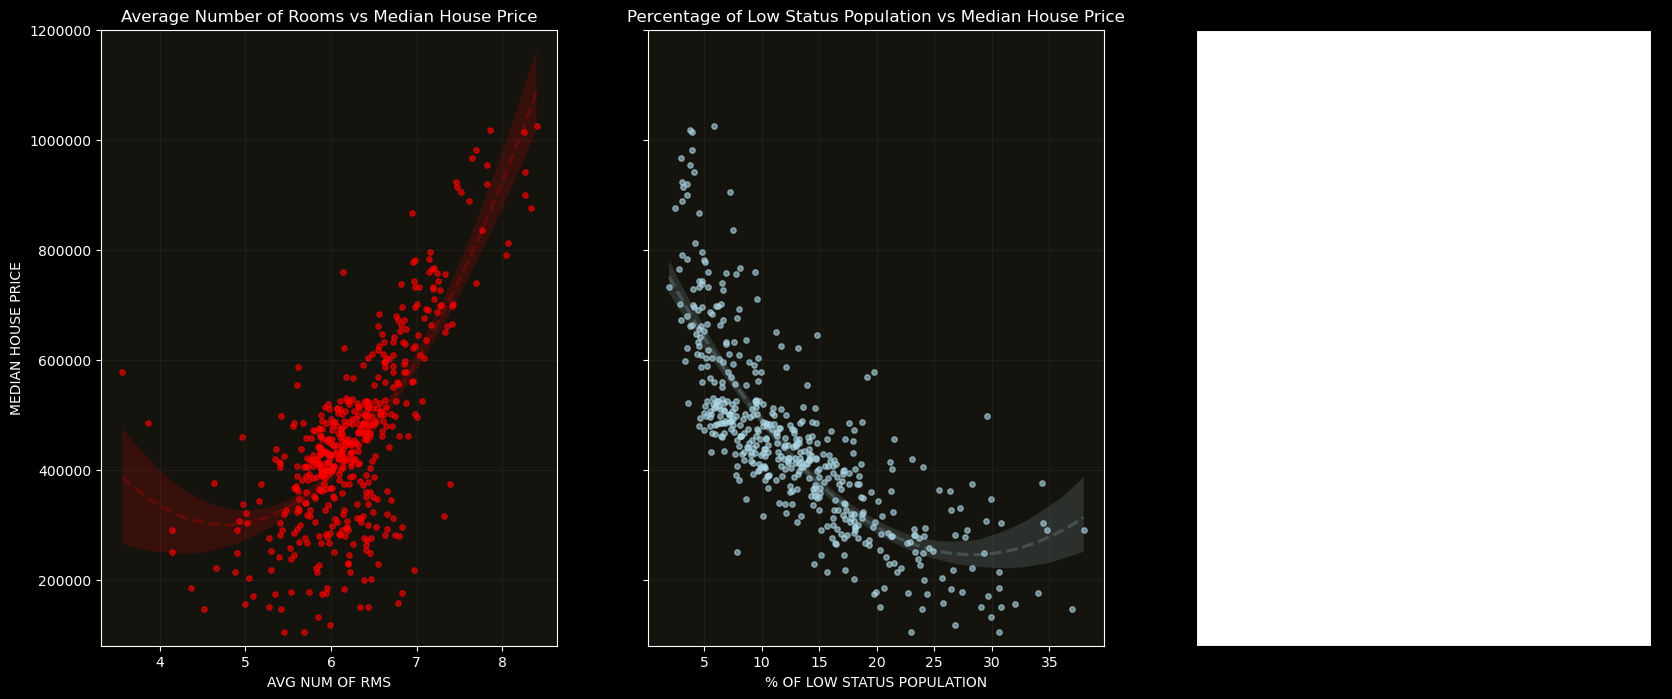

In [50]:
# as there's no missing values, let's look for correlations and distributions
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# setting up the plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize= (20,8), facecolor="#000000", sharey=True)

# First let's plot RM vs MEDV (avg number of rooms vs price)
sns.regplot(x="RM", y="MEDV", data=df, order=2, ax=ax1 ,scatter_kws={"color": "red", "alpha": 0.6, "s": 15}, line_kws={"color": "red", "linestyle": "--", "alpha":0.2})
ax1.set_title("Average Number of Rooms vs Median House Price", color="white")
ax1.tick_params(colors="white")
ax1.yaxis.get_major_formatter().set_scientific(False)
ax1.set_xlabel("AVG NUM OF RMS", color= "white")
ax1.set_ylabel("MEDIAN HOUSE PRICE", color = "white")
ax1.set_facecolor("#15130d")
ax1.grid("True", color = "gray", alpha = 0.1)
ax1.set_ylim(80000, 1200000)
for spine in ax1.spines.values():
        spine.set_color("white")

# Then Let's plot the correlation of the percentage of low status population vs house pricing
sns.regplot(x="LSTAT", y="MEDV", data=df, order=2, ax=ax2, scatter_kws={"color":"lightblue", "alpha": 0.6, "s": 15}, line_kws={"color": "lightblue", "linestyle": "--", "alpha": 0.2})
ax2.set_title("Percentage of Low Status Population vs Median House Price", color = "white")
ax2.tick_params(colors= "white")
ax2.set_xlabel("% OF LOW STATUS POPULATION", color = "white")
ax2.set_facecolor("#15130d")
ax2.grid("True", color = "gray", alpha = 0.1)
ax2.set_ylim(80000, 1200000)
for spine in ax2.spines.values():
        spine.set_color("white")
